In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [50]:
df = pd.read_csv("sentiment.csv")

print(" Dataset Sample:")
display(df.head())

print("\nDataset Shape:", df.shape)
print("Class distribution:\n", df['label'].value_counts())

 Dataset Sample:


,text,label
0,"I loved this movie, it was fantastic!",positive
1,This was the worst film I’ve ever seen.,negative
2,Amazing storyline and brilliant acting.,positive
3,Terrible direction and boring scenes.,negative
4,"An enjoyable watch, highly recommended!",positive



Dataset Shape: (48, 2)
Class distribution:
 label
positive    24
negative    24
Name: count, dtype: int64


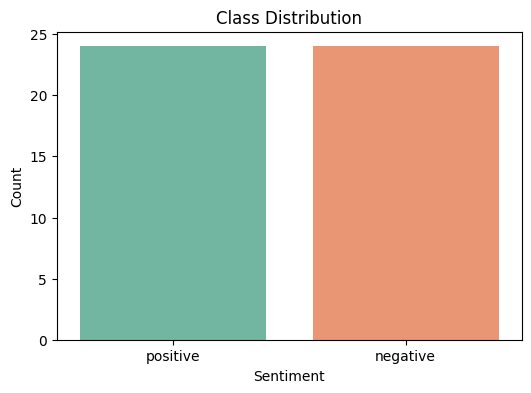

In [55]:

plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, hue='label', palette="Set2", legend=False)
plt.title("Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], 
    test_size=0.2, random_state=42, stratify=df['label']
)


In [45]:
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))  # prevent convergence warnings
])



In [52]:
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)





In [53]:
print("\n✅ Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


✅ Model Evaluation:
Accuracy: 0.6

Classification Report:
               precision    recall  f1-score   support

    negative       0.57      0.80      0.67         5
    positive       0.67      0.40      0.50         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10



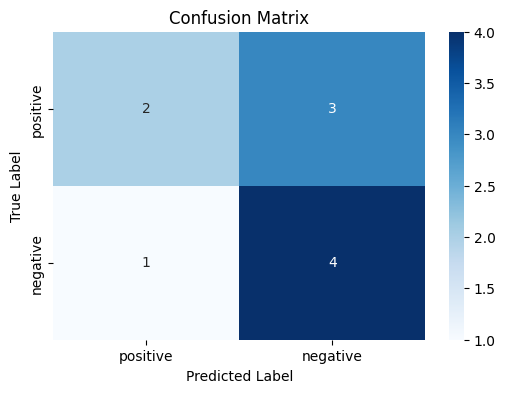

In [54]:
cm = confusion_matrix(y_test, y_pred, labels=["positive", "negative"])
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["positive","negative"], yticklabels=["positive","negative"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()